# Chapter 5 Applied Questions 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

## 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [2]:
default = pd.read_csv(r'./data/Default.csv',index_col=0)
print(default.shape)
default.head()

(10000, 4)


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [3]:
encoding_dict = {'Yes':1,'No':0}
default['default'] = default['default'].map(encoding_dict)

### (a) Fit a logistic regression model that uses income and balance to predict default.

In [4]:
lr = LogisticRegression()
lr.fit(default[['income','balance']],default['default'])
pred = lr.predict(default[['income','balance']])
print('Train accuracy is ',accuracy_score(pred,default['default']))

Train accuracy is  0.9737


### (b) Using the validation set approach, estimate the test error of this model.

In [5]:
# splitting the data into train and test
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default','student'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 0)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

Shape of X_train  (7000, 2)
Shape of X_valid  (3000, 2)


In [6]:
# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [7]:
# obtain the predictions
pred = lr.predict(X_valid)

In [8]:
# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Validation error is  0.02733333333333332


### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [9]:
# random_state = 1
# splitting the data into train and test
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default','student'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 1)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

# obtain the predictions
pred = lr.predict(X_valid)

# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Shape of X_train  (7000, 2)
Shape of X_valid  (3000, 2)
Validation error is  0.024666666666666615


In [10]:
# random_state = 5
# splitting the data into train and test
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default','student'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 5)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

# obtain the predictions
pred = lr.predict(X_valid)

# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Shape of X_train  (7000, 2)
Shape of X_valid  (3000, 2)
Validation error is  0.03400000000000003


In [11]:
# random_state = 10
# splitting the data into train and test
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default','student'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 10)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

# obtain the predictions
pred = lr.predict(X_valid)

# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Shape of X_train  (7000, 2)
Shape of X_valid  (3000, 2)
Validation error is  0.037666666666666626


### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [12]:
default['student'] = default['student'].map(encoding_dict)

In [13]:
# splitting the data into train and test
# we only drop default for the train data
# NOTE - We are using random state = 1
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 1)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

# obtain the predictions
pred = lr.predict(X_valid)

# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Shape of X_train  (7000, 3)
Shape of X_valid  (3000, 3)
Validation error is  0.03200000000000003


#### we can see above that while using balance and income for predicting default, validation error was 30.0333. When we added 
#### a new dummy variable student, the error remains the same ( random_state = 1)

## 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

In [14]:
print(default.shape)
default.head()

(10000, 4)


,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [15]:
X = default[['balance','income']]
X = sm.add_constant(X)
y = default['default']

results = sm.Logit(y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.4594
Time:                        16:38:14   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

#### std error for balance = 0, std error for incomes = 4.99e-06

### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [16]:
# to get random indices of given size
# since the classes are imbalanced, we want the to random indeces to contain botht the classes, otherwise it will preocude an e
# error, as model can't train if all observations belong to one class

def get_indices(data,num_samples):
  positive_data = data[data['default'] == 1]
  negative_data = data[data['default'] == 0]

  positive_indices = np.random.choice(positive_data.index, int(num_samples / 4), replace=True)
  negative_indices = np.random.choice(negative_data.index, int(3*num_samples / 4), replace=True)
  total = np.concatenate([positive_indices,negative_indices])
  np.random.shuffle(total)
  return total

In [17]:
# similar to boot.fn in exercise

def boot_fn(data,index):
  X = data[['balance','income']].loc[index]
  y = data['default'].loc[index]

  lr = LogisticRegression()
  lr.fit(X,y)
  intercept = lr.intercept_
  coef_balance = lr.coef_[0][0]
  coef_income = lr.coef_[0][1]
  return [intercept,coef_balance,coef_income]

In [18]:
# example - 
intercept,coef_balance,coef_income = boot_fn(default,get_indices(default,100))
print('Intercept is {}, the coeff of balance is {} , the coeff for income is {} '.format(intercept,coef_balance,coef_income))

Intercept is [-7.73549328], the coeff of balance is 0.004368989435437689 , the coeff for income is 2.0910411067116945e-05 


### (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [19]:
def boot(data,func,R):
  intercept = []
  coeff_balance = []
  coeff_income = []
  for i in range(R):
    [inter,balance,income] = func(data,get_indices(data,100))
    intercept.append(float(inter))
    coeff_balance.append(balance)
    coeff_income.append(income)

  intercept_statistics = {'estimated_value':np.mean(intercept),'std_error':np.std(intercept)}   
  balance_statistics = {'estimated_value':np.mean(coeff_balance),'std_error':np.std(coeff_balance)}
  income_statistics = {'estimated_value':np.mean(coeff_income),'std_error':np.std(coeff_income)}
  return {'intercept':intercept_statistics,'balance_statistices':balance_statistics,'income_statistics':income_statistics}

In [20]:
results = boot(default,boot_fn,1000)

In [21]:
print('Balance - ',results['balance_statistices'])
print('Income - ', results['income_statistics'])

Balance -  {'estimated_value': 0.003262003954160367, 'std_error': 0.002603564742202376}
Income -  {'estimated_value': -4.7147269941896934e-05, 'std_error': 5.390874578660296e-05}


#### we can see that the standard errors obtained from model and from boostrap are similar

### 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set.

In [22]:
weekly = pd.read_csv(r'./data/Weekly.csv')
print(weekly.shape)
weekly.head()

(1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [23]:
weekly['Direction'] = weekly['Direction'].map({'Down':0,'Up':1})

### (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [24]:
X = weekly[['Lag1','Lag2']]
y = weekly['Direction']
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

### (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [25]:
X = weekly[['Lag1','Lag2']].drop(0,axis = 0)
y = weekly['Direction'].drop(0,axis = 0)

lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [26]:
X_test = weekly[['Lag1','Lag2']].loc[[0]]
y_test = weekly['Direction'].loc[0]

print('Predicted - {}, true value - {}'.format(int(lr.predict(X_test)),y_test))
# it is wrongly classified

Predicted - 1, true value - 0


### (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:

In [27]:
score = []
for i in range(len(weekly)):
  X = weekly[['Lag1','Lag2']].drop(i,axis = 0)
  y = weekly['Direction'].drop(i,axis = 0)

  lr = LogisticRegression()
  lr.fit(X,y)

  X_test = weekly[['Lag1','Lag2']].loc[[i]]
  y_test = weekly['Direction'].loc[i]

  pred = int(lr.predict(X_test))
  score.append(int(pred == y_test))

### (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [28]:
print('Accuracy is ',np.mean(score))
print('LOOCV error is ',1 - np.mean(score))

Accuracy is  0.5500459136822773
LOOCV error is  0.4499540863177227


## 8. We will now perform cross-validation on a simulated data set.

### (a) Generate a simulated data set as follows:

In [29]:
np.random.seed(1)
y = np.random.normal(size = 100)
X = np.random.normal(size = 100)
y = X - 2*(X**2) + np.random.normal(size = 100) 

### (b) Create a scatterplot of X against Y . Comment on what you find

Text(0.5, 1.0, 'Scatter plot')

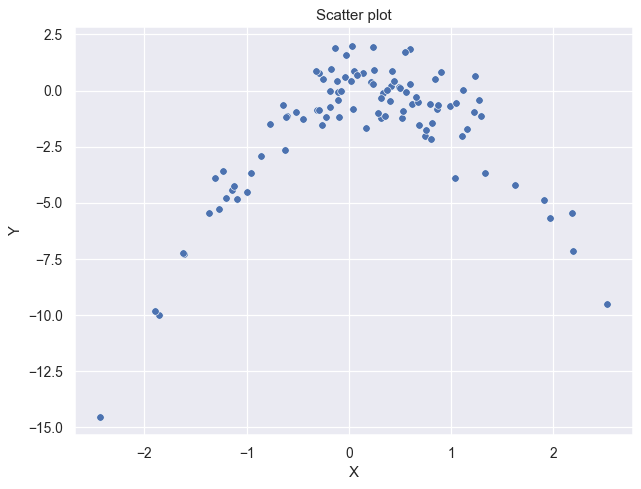

In [32]:
sns.set(rc={'figure.figsize':(8,6), "figure.dpi":90})

sns.scatterplot(x=X, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot')

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [33]:
#i. Y = β0 + β1X + eps
#ii. Y = β0 + β1X + β2X2 +
#iii. Y = β0 + β1X + β2X2 + β3X3 +
#iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + 
np.random.seed(1)
for i in range(1,5):
  poly = PolynomialFeatures(i,include_bias=False)
  predictors = poly.fit_transform(X.reshape(-1,1))

  lr = LinearRegression()
  error = -1*cross_val_score(lr,predictors,y,cv = len(X),scoring = 'neg_mean_squared_error').mean()
  print('For model {} , error is {}'.format(i,error))

For model 1 , error is 8.292211622874765
For model 2 , error is 1.0170958070339804
For model 3 , error is 1.0465534563296675
For model 4 , error is 1.0574926712115136


#### Best error value if for degree = 2, and since its stimulated data, we know that the real relationship is also quadratic.

### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [34]:
# repeting the same experiment, this time setting different seed
np.random.seed(5)
for i in range(1,5):
  poly = PolynomialFeatures(i,include_bias=False)
  predictors = poly.fit_transform(X.reshape(-1,1))

  lr = LinearRegression()
  error = -1*cross_val_score(lr,predictors,y,cv = len(X),scoring = 'neg_mean_squared_error').mean()
  print('For model {} , error is {}'.format(i,error))

For model 1 , error is 8.292211622874765
For model 2 , error is 1.0170958070339804
For model 3 , error is 1.0465534563296675
For model 4 , error is 1.0574926712115136


#### The results we got are absolutely the same, this is becaise there is no random sampling in LOOCV. Everytime, we fit n models
#### such that each time, model will be trained on n-1 observations, and than tested on a left out observations.

### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [35]:
for i in range(1,5):
  # remember this time we are not setting include bias = False
  poly = PolynomialFeatures(i)
  predictors = poly.fit_transform(X.reshape(-1,1))

  results = sm.OLS(y,predictors).fit()
  print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.460
Date:                Sun, 28 Mar 2021   Prob (F-statistic):            0.00272
Time:                        16:45:00   Log-Likelihood:                -242.69
No. Observations:                 100   AIC:                             489.4
Df Residuals:                      98   BIC:                             494.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7609      0.280     -6.278      0.0

#### from the above table we notice two things - 
#### Firstly, value of adjusted R_square doesn;t increase after quadratic
#### Secondly, Only p values of X1 and X2 are significant
#### Hence the best model is quadratic model, which is what we got by observing the LOOCV values

## 9. We will now consider the Boston housing data set, from the MASS library.

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['MEDV'] = boston.target
print(data.shape)
data.head()
# by the way, we only need the medv columns, so, you could save yourself some lines of code, and just do 
# medv = boston.target

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate ˆμ.

In [37]:
print('Estimated population mean is ',np.mean(data['MEDV']))

Estimated population mean is  22.532806324110677


### (b) Provide an estimate of the standard error of ˆμ. Interpret this result.

In [38]:
print('Estimation of standard error is ',np.std(data['MEDV']) / np.sqrt(len(data)))

Estimation of standard error is  0.4084569346972866


### (c) Now estimate the standard error of ˆμ using the bootstrap. How does this compare to your answer from (b)?

In [39]:
def boot(data,R):
  medv = []
  num_samples = 500
  for i in range(R):
    indices = np.random.choice(data.index, num_samples, replace=True)
    medv.append(data['MEDV'].loc[indices].mean())
  bootstrap_statistics = {'estimated_value':np.mean(medv),'std_dev':np.std(medv)}   
  return bootstrap_statistics

In [40]:
result = boot(data,1000)
print('Bootstrap results ',result)

Bootstrap results  {'estimated_value': 22.5227814, 'std_dev': 0.3997356650763603}


#### the value of standad error and mean is pretty much the same as we obtained eralier

###  d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv.

In [41]:
mean = result['estimated_value']
std = result['std_dev']

print('With 95% confidence we can say that intercal is [{},{}]'.format(mean - 2*std,mean+ 2*std))

With 95% confidence we can say that intercal is [21.72331006984728,23.32225273015272]


### (e) Based on this data set, provide an estimate, ˆμmed, for the median value of medv in the population

In [42]:
print('Estimated value median is ',np.median(data['MEDV']))

Estimated value median is  21.2


### (f) We now would like to estimate the standard error of ˆμmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [43]:
def boot(data,R):
  median = []
  num_samples = 500
  for i in range(R):
    indices = np.random.choice(data.index, num_samples, replace=True)
    median.append(data['MEDV'].loc[indices].median())
  bootstrap_statistics = {'estimated_value':np.mean(median),'std_dev':np.std(median)}   
  return bootstrap_statistics

In [44]:
result = boot(data,1000)
print('Boostrap Results for median are - ',result)

Boostrap Results for median are -  {'estimated_value': 21.1849, 'std_dev': 0.3725144158284345}


#### we can see that the mean we calculated earlier is very similar to the estimated value

### (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs.

In [45]:
print('Estimate for Quantile  - ',data['MEDV'].quantile(0.1))

Estimate for Quantile  -  12.75


In [46]:
def boot(data,R):
  ten_quantiles = []
  num_samples = 500
  for i in range(R):
    indices = np.random.choice(data.index, num_samples, replace=True)
    ten_quantiles.append(data['MEDV'].loc[indices].quantile(0.1))
  bootstrap_statistics = {'estimated_value':np.mean(ten_quantiles),'std_dev':np.std(ten_quantiles)}   
  return bootstrap_statistics

result = boot(data,1000)
print('Boostrap Results for median are - ',result)

Boostrap Results for median are -  {'estimated_value': 12.73111, 'std_dev': 0.5124676261970115}
